In [57]:
# import library
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [58]:
# create dataframe from csv file
data = pd.read_csv('Dataset Beras New Fix.csv', index_col='Tanggal', parse_dates=True)
data.tail(30)

,Premium,Medium
Tanggal,,
2025-01-02,15200.0,12800.0
2025-01-03,15200.0,12800.0
2025-01-04,15200.0,12800.0
2025-01-05,15200.0,12800.0
2025-01-06,15200.0,12800.0
2025-01-07,15200.0,12800.0
2025-01-08,15200.0,12800.0
2025-01-09,15200.0,12800.0
2025-01-10,15200.0,12800.0


<Axes: xlabel='Tanggal'>

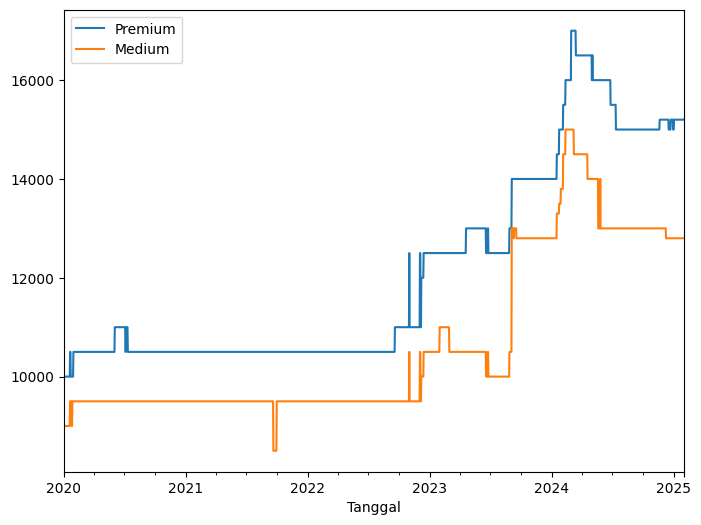

In [59]:
# plot data
data.plot()

In [60]:
# Beras Medium
# Scaling Data menggunakan minmax scaller
min_max_scaler = MinMaxScaler(feature_range=(1, 2))
dataset = min_max_scaler.fit_transform(
    data['Medium'].values.reshape(-1, 1)
    )

In [61]:
data_awal = data['Medium'].values.reshape(-1)
data_minmax = dataset.reshape(-1)
# data_predict
new_df = {
    "data asli" : data_awal,
    "min-max": data_minmax
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)
# data_minmax

,data asli,min-max
787,9500.0,1.153846
189,9500.0,1.153846
747,9500.0,1.153846
1646,13000.0,1.692308
6,9000.0,1.076923
1366,12800.0,1.661538
365,9500.0,1.153846
1637,13000.0,1.692308
828,9500.0,1.153846
1087,10500.0,1.307692


In [62]:
# membuat fungsi window dataset
def windowed_dataset(dataset, window_size=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size-1):
        a = dataset[i:(i+window_size), 0]
        dataX.append(a)
        dataY.append(dataset[i + window_size, 0])
    return np.array(dataX), np.array(dataY)

In [63]:
# split data menjadi data train dan data validasi
train_size = int(len(dataset) * 0.8)
validation_size = len(dataset) - train_size
train, validation = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(validation))

1486 372


In [64]:
# Parameters
window_size = 20

# membuat window data train dan validation
x_train, y_train = windowed_dataset(train, window_size)
x_validation, y_validation = windowed_dataset(validation, window_size)
x_train[0]


array([1.07692308, 1.07692308, 1.07692308, 1.07692308, 1.07692308,
       1.07692308, 1.07692308, 1.07692308, 1.07692308, 1.07692308,
       1.07692308, 1.07692308, 1.07692308, 1.07692308, 1.07692308,
       1.07692308, 1.07692308, 1.07692308, 1.07692308, 1.15384615])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

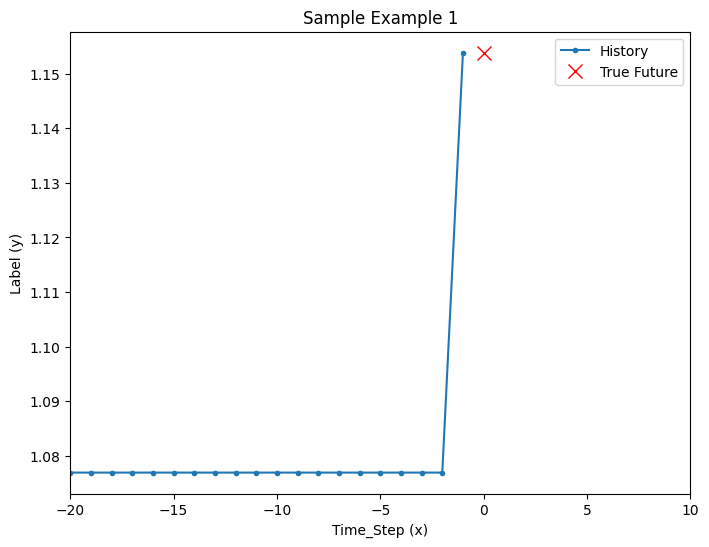

In [65]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step (x)')
  plt.ylabel('Label (y)')

  return plt

plot_time_series([x_train[0] , y_train[0]] , 0 , 'Sample Example 1')

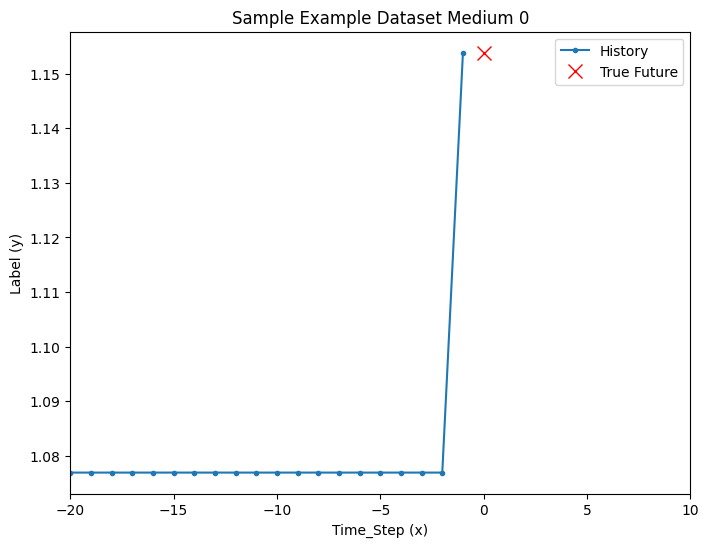

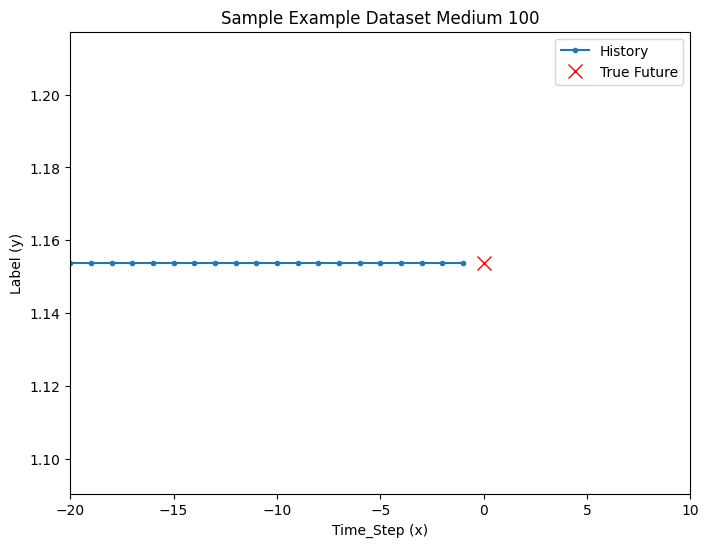

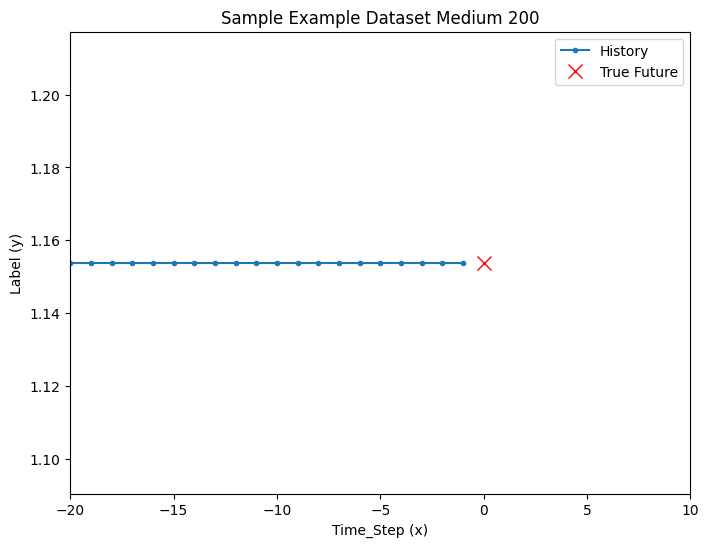

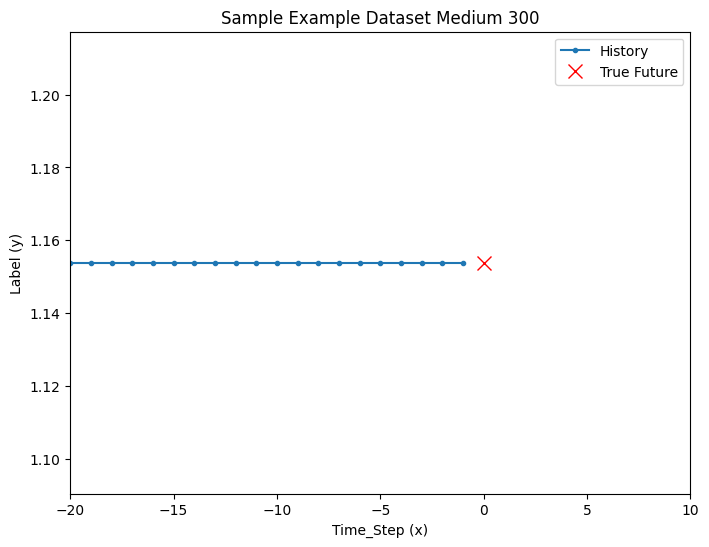

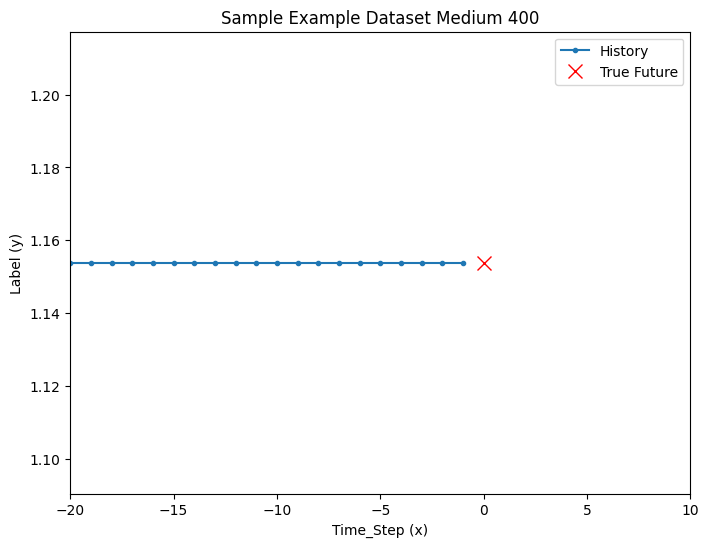

In [66]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:
    plot = plot_time_series([x_train[i] , y_train[i]] , 0 , f'Sample Example Dataset Medium {i}')
    plot.show()

In [67]:
value_train = {}
for i, j in enumerate(x_train[0]):
    value_train[f"x{i+1}"] = [j]

value_train['y'] = y_validation[0]

df_windows = pd.DataFrame(value_train)
df_windows.sample(20, replace=True)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0
0,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,...,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.076923,1.153846,2.0


In [68]:
# cek dimensi data yang sudah dibuat menjadi window dataset
print(f"x train : {x_train.shape}")
print(f"y train : {y_train.shape}")
print(f"x validation : {x_validation.shape}")
print(f"y validation : {y_validation.shape}")

x train : (1465, 20)
y train : (1465,)
x validation : (351, 20)
y validation : (351,)


In [69]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_validation = np.reshape(x_validation, (x_validation.shape[0], 1, x_validation.shape[1]))

In [70]:
## prepare tensorflow dataset
batch_size = 256
buffer_size = 10000

train_dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train))
train_dataset = train_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((x_validation , y_validation))
val_dataset = val_dataset.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_dataset)
print(val_dataset)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 1, 20), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [71]:
# membuat model lstm menggunakan keras
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.LSTM(40, input_shape=(1, window_size))),
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
# set loss dan optimizer training data
optimizer = 'adam'

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train model
steps = 200
EPOCHS = 100
history = model.fit(train_dataset , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_dataset, validation_steps = 50)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3032 - mae: 0.3379 - val_loss: 0.0138 - val_mae: 0.1086
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - mae: 0.0275 - val_loss: 0.0036 - val_mae: 0.0513
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - mae: 0.0181 - val_loss: 0.0012 - val_mae: 0.0219
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mae: 0.0128 - val_loss: 8.8115e-04 - val_mae: 0.0162
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0011 - mae: 0.0116 - val_loss: 8.0821e-04 - val_mae: 0.0162
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8733e-04 - mae: 0.0108 - val_loss: 7.3296e-04 - val_mae: 0.0155
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2259e-04 - mae: 0.0104 - val_loss: 6.5540e-04 - val_mae: 0.0144
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.0708e-04 - mae: 0.0095 - val_loss: 5.8312e-04 - val_mae: 0.0132
Epoch 9/100
200

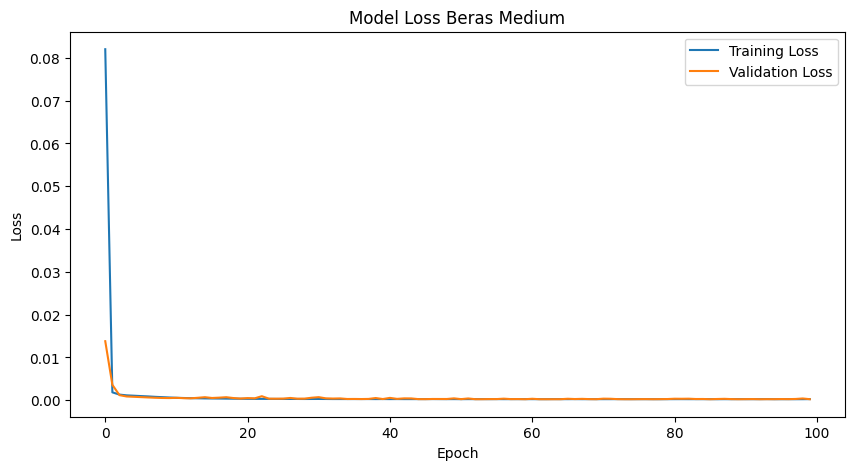

In [73]:
# Plot loss and accuracy selama training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Beras Medium')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_validation)

# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_validation])

# calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Score: 98.84 RMSE
Test Score: 102.23 RMSE


In [75]:
def calculate_mape(actual, predicted) -> float:
  mape = np.mean(np.abs((actual - predicted)/actual))*100
  return mape

In [76]:
# calculate root mean squared error
trainScore = calculate_mape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = calculate_mape(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.15 MAPE
Test Score: 0.25 MAPE


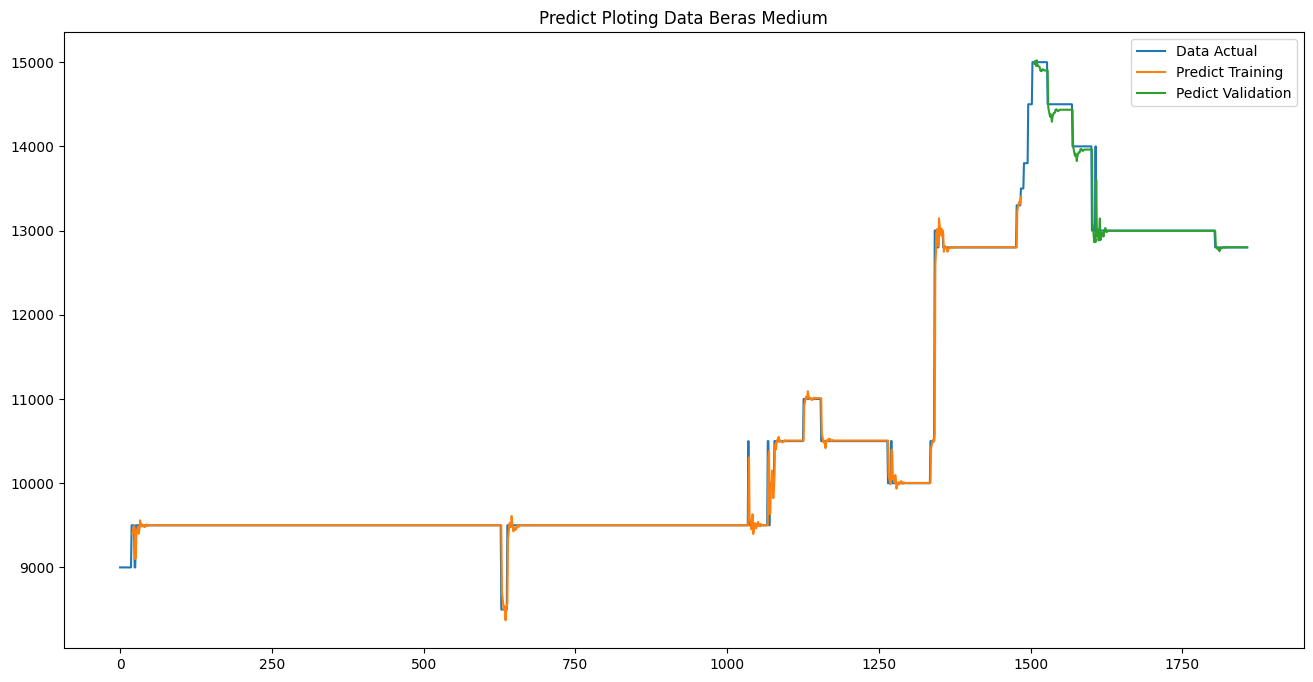

In [77]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(min_max_scaler.inverse_transform(dataset), label='Data Actual')
plt.plot(trainPredictPlot, label='Predict Training')
plt.plot(testPredictPlot, label='Pedict Validation')
plt.title('Predict Ploting Data Beras Medium')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


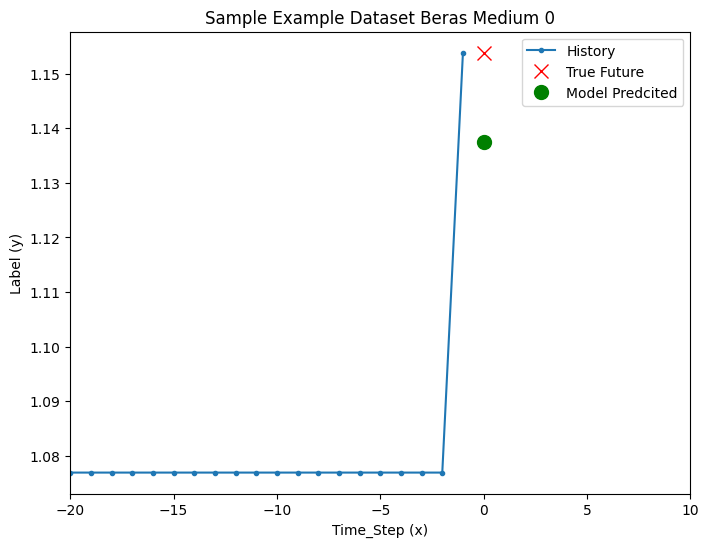

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


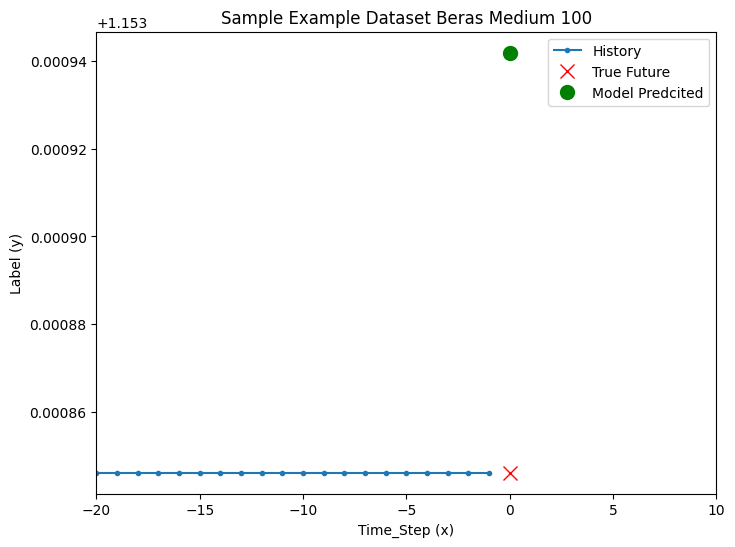

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


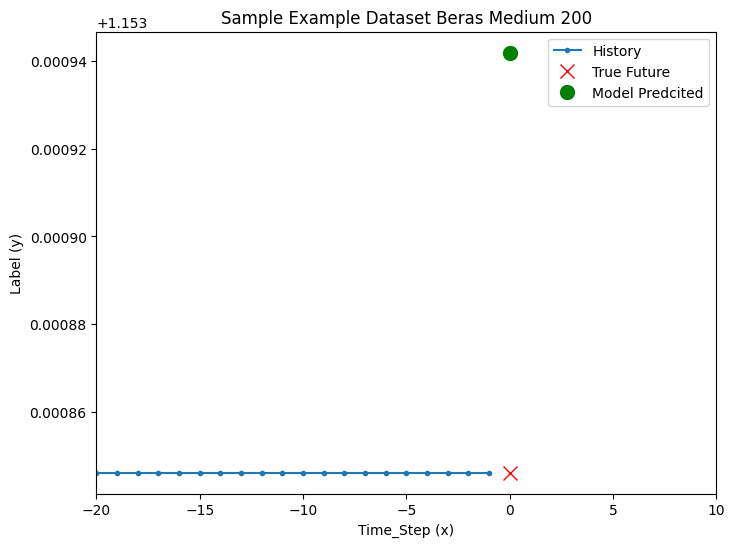

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


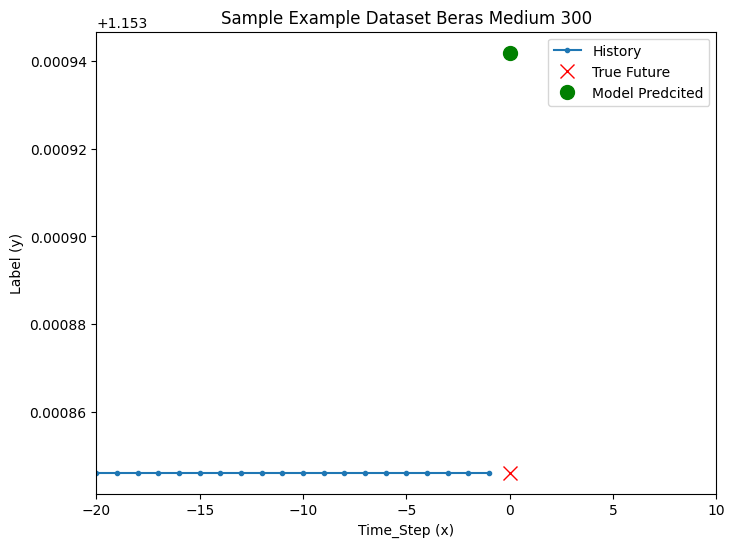

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


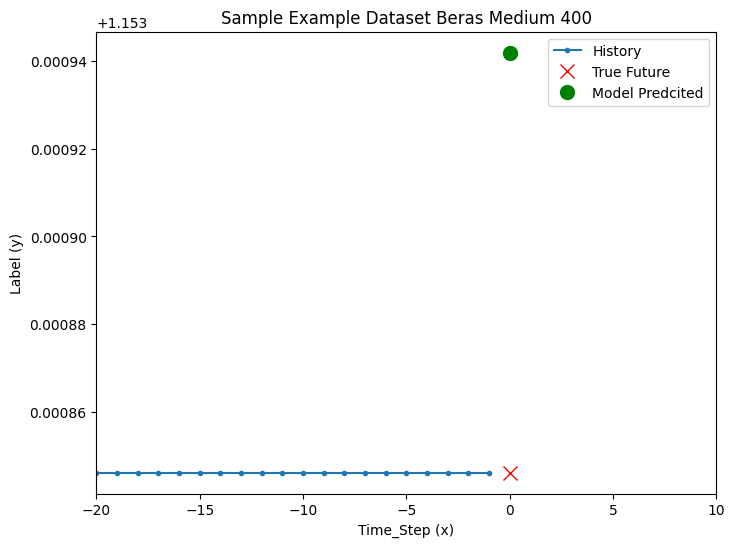

In [78]:
n_data = [0, 100, 200, 300, 400]
for i in n_data:

    dapapred = np.reshape(x_train[i], (x_train[i].shape[0], 1, x_train[i].shape[1]))

    plot = plot_time_series([x_train[i].reshape(-1) , y_train[i], model.predict(dapapred)] , 0 , f'Sample Example Dataset Beras Medium {i}')
    plot.show()

In [79]:
data_awal_predict = dataset[-20:]
data_awal_predict_reshape = np.reshape(data_awal_predict, (data_awal_predict.shape[1], 1, data_awal_predict.shape[0]))
data_awal_predict_reshape.shape

(1, 1, 20)

In [80]:
data_awal = data[window_size:500+window_size]
data_predict = trainPredict[:500]

# data_predict medium
new_df = {
    "Tanggal" : data_awal.index,
    "Harga Aktual" : data_awal['Medium'].values,
    "Harga Prediksi": data_predict.reshape(-1)
}

dataframe = pd.DataFrame(new_df)
dataframe.sample(10)

,Tanggal,Harga Aktual,Harga Prediksi
447,2021-04-12,9500.0,9500.621094
321,2020-12-07,9500.0,9500.621094
20,2020-02-10,9500.0,9480.981445
338,2020-12-24,9500.0,9500.621094
457,2021-04-22,9500.0,9500.621094
320,2020-12-06,9500.0,9500.621094
225,2020-09-02,9500.0,9500.621094
390,2021-02-14,9500.0,9500.621094
22,2020-02-12,9500.0,9502.846680
100,2020-04-30,9500.0,9500.621094


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

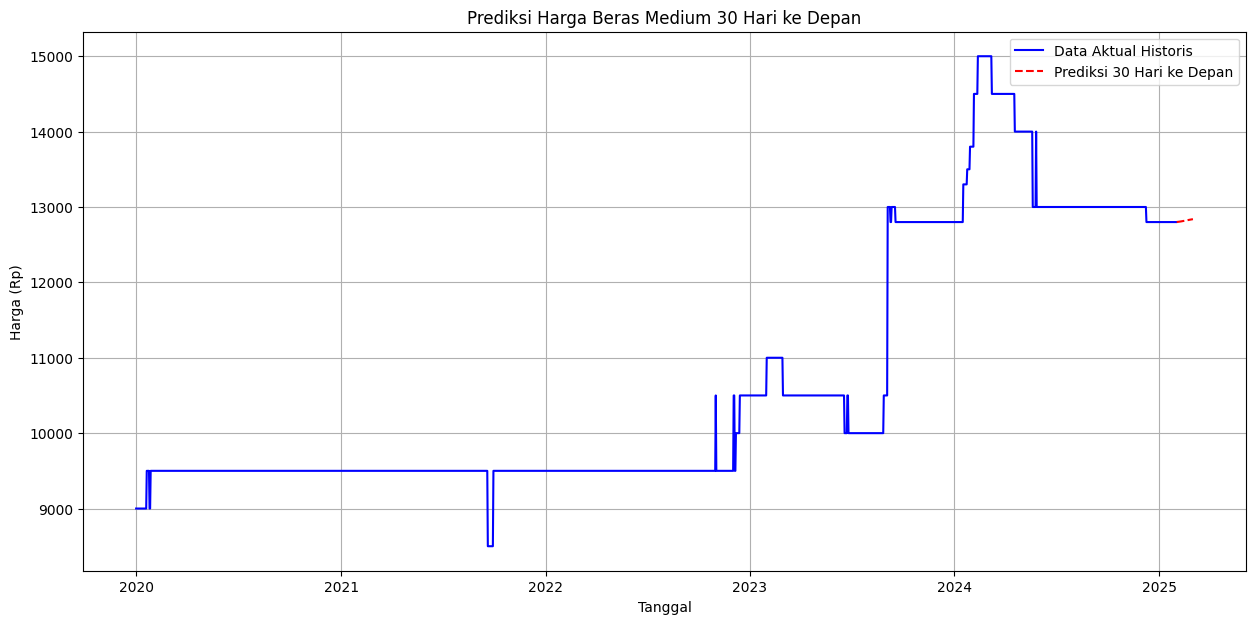

Tabel Prediksi Harga 30 Hari ke Depan:
      Tanggal  Prediksi 30 Hari ke Depan
0  2025-02-01               12801.021397
1  2025-02-02               12801.900089
2  2025-02-03               12802.745461
3  2025-02-04               12803.625703
4  2025-02-05               12804.584980
5  2025-02-06               12805.548906
6  2025-02-07               12806.581795
7  2025-02-08               12807.810724
8  2025-02-09               12809.090018
9  2025-02-10               12810.388684
10 2025-02-11               12811.706722
11 2025-02-12               12813.084424
12 2025-02-13               12814.493895
13 2025-02-14               12815.889418
14 2025-02-15               12817.316711
15 2025-02-16               12818.750978
16 2025-02-17               12820.211589
17 2025-02-18               12821.686149
18 2025-02-19               12823.173881
19 2025-02-20               12824.654639
20 2025-02-21               12826.118350
21 2025-02-22               12827.569664
22 2025-02-23     

In [81]:
# =================================================================================
# KODE UNTUK PREDIKSI 30 HARI KE DEPAN (SUDAH DIPERBAIKI)
# =================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Menentukan jumlah hari untuk prediksi
n_future = 30

# 2. Mengambil data sekuens terakhir dari dataset utama sebagai input awal
#    PERBAIKAN: Menggunakan variabel 'dataset' sesuai notebook Anda
last_sequence = dataset[-window_size:]
current_batch = last_sequence.reshape(1, 1, window_size)

# 3. Looping untuk melakukan prediksi
future_predictions = []
for i in range(n_future):
    # Prediksi 1 hari ke depan
    current_pred = model.predict(current_batch)[0]

    # Simpan hasil prediksi
    future_predictions.append(current_pred)

    # Update batch input: hapus data pertama dan tambahkan hasil prediksi di akhir
    # Reshape current_pred agar sesuai untuk digabungkan
    reshaped_pred = current_pred.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, :, 1:], reshaped_pred, axis=2)


# 4. Mengembalikan hasil prediksi ke skala harga aslinya
#    PERBAIKAN: Menggunakan 'min_max_scaler' sesuai notebook Anda
future_predictions_inversed = min_max_scaler.inverse_transform(future_predictions)

# 5. Membuat rentang tanggal untuk 30 hari ke depan
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)

# 6. Membuat DataFrame untuk hasil prediksi
df_past = data[['Medium']].reset_index()
df_past.rename(columns={'Tanggal': 'Tanggal', 'Medium': 'Data Aktual'}, inplace=True)

df_future = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi 30 Hari ke Depan': future_predictions_inversed.flatten()
})

# 7. Visualisasi hasil
plt.figure(figsize=(15, 7))
plt.plot(df_past['Tanggal'], df_past['Data Aktual'], label='Data Aktual Historis', color='blue')
plt.plot(df_future['Tanggal'], df_future['Prediksi 30 Hari ke Depan'], label='Prediksi 30 Hari ke Depan', color='red', linestyle='--')
plt.title('Prediksi Harga Beras Medium 30 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan tabel hasil prediksi
print("Tabel Prediksi Harga 30 Hari ke Depan:")
print(df_future.to_string())

In [82]:
import pickle
# Beras Medium
# Menyimpan Model Keras ke dalam Format H5
nama_file_model = 'model_prediksi_beras_medium.h5'
model.save(nama_file_model)

print(f"Model berhasil disimpan sebagai '{nama_file_model}'")

# Menyimpan Scaler menggunakan Pickle
nama_file_scaler = 'scaler_medium.pkl'
with open(nama_file_scaler, 'wb') as file:
    pickle.dump(min_max_scaler, file)

print(f"Scaler berhasil disimpan sebagai '{nama_file_scaler}'")

Model berhasil disimpan sebagai 'model_prediksi_beras_medium.h5'
Scaler berhasil disimpan sebagai 'scaler_medium.pkl'
